<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#global print for decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
pwd

'/Users/xiaoyunchen/Desktop/Python-Module'

In [31]:
goodreads_df = pd.read_csv('book_metadata.csv', sep=',')

In [35]:
goodreads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4621 non-null   int64  
 1   Title       4621 non-null   object 
 2   Author      4621 non-null   object 
 3   Score       4621 non-null   float64
 4   Ratings     4621 non-null   int64  
 5   Published   4621 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 216.7+ KB


In [32]:
goodreads_df.head()

,Unnamed: 0,Title,Author,Score,Ratings,Published
0,0,The Rabbit Hutch,Tess Gunty,3.58,16471,2022
1,1,Paris: The Memoir,Paris Hilton,4.24,18905,2023
2,2,Fearless (Ben Koenig #1),M.W. Craven,4.24,638,2023
3,3,Forever Home,Graham Norton,3.94,7877,2022
4,4,Double-Decker Dreams,Lindsay MacMillan,3.05,367,2023


In [9]:
goodreads_df.tail()

,Unnamed: 0,Title,Author,Score,Ratings,Published
4616,4616,Junker Seven,Olive J. Kelley,4.59,49,2023
4617,4617,Dylan Dog n. 442 bis: L&#39;isola dai due soli,Davide La Rosa,3.30,20,2023
4618,4618,No One Here Gets Out Alive,Jerry Hopkins,3.93,43446,1980
4619,4619,The Grace Year,Kim Liggett,4.15,100349,2019
4620,4620,The Watchmaker&#39;s Daughter: The True Story ...,Larry Loftis,4.28,1390,2023


In [17]:
goodreads_df.keys()
#same as: goodreads_df.columns

Index(['Unnamed: 0', 'Title', 'Author', 'Score', 'Ratings', 'Published'], dtype='object')

In [37]:
#check for null value
goodreads_df.isnull().sum()

Unnamed: 0    0
Title         0
Author        0
Score         0
Ratings       0
Published     0
dtype: int64

In [38]:
#get descriptive statistics
goodreads_df.describe(include='all')

,Unnamed: 0,Title,Author,Score,Ratings,Published
count,4621.000,4621,4621,4621.000,4621.000,4621.000
unique,NaN,4621,3240,NaN,NaN,NaN
top,NaN,The Rabbit Hutch,Stephen King,NaN,NaN,NaN
freq,NaN,1,25,NaN,NaN,NaN
mean,2310.000,NaN,NaN,4.096,135836.194,2000.327
std,1334.112,NaN,NaN,0.308,433372.009,155.057
min,0.000,NaN,NaN,2.430,1.000,-700.000
25%,1155.000,NaN,NaN,3.910,1225.000,2015.000
50%,2310.000,NaN,NaN,4.120,9670.000,2021.000
75%,3465.000,NaN,NaN,4.300,75203.000,2023.000


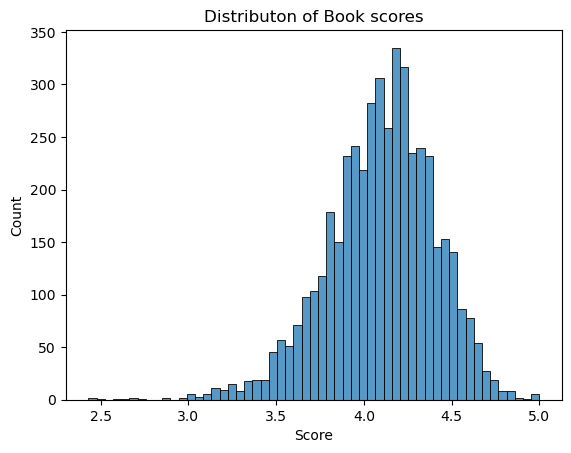

In [40]:
sns.histplot(data=goodreads_df, x='Score')
plt.title("Distributon of Book scores")
plt.show()

In [42]:
goodreads_df['Published'].value_counts()

2023    1490
2022     583
2021     401
2020     331
2019     286
        ... 
1692       1
1792       1
1860       1
1868       1
1940       1
Name: Published, Length: 193, dtype: int64

In [43]:
goodreads_df['Published'].value_counts()[:10]

2023    1490
2022     583
2021     401
2020     331
2019     286
2018     226
2016      54
2014      53
2015      50
2006      49
Name: Published, dtype: int64

In [45]:
new_books = goodreads_df[goodreads_df['Published'] >= 2020]
old_books = goodreads_df[goodreads_df.Published.isin(new_books.Published) == False]
print(f"{len(new_books)} books are published in 2020 and beyond")
print(f"{len(old_books)} books are published before 2020")

2805 books are published in 2020 and beyond
1816 books are published before 2020


Which are the top 10 most popular books?

In [54]:
goodreads_df['Ratings'].value_counts()[:10]

62    10
23     9
9      9
12     8
38     7
7      7
36     7
8      7
94     7
24     6
Name: Ratings, dtype: int64

In [56]:
goodreads_df['Score'].value_counts()

4.090    78
4.160    76
4.000    74
4.140    71
4.210    69
         ..
2.630     1
2.470     1
2.750     1
2.690     1
2.710     1
Name: Score, Length: 192, dtype: int64

In [60]:
top10 = goodreads_df.sort_values('Ratings', ascending=False)[:10]

In [61]:
top10.sort_values('Score', ascending=False)

,Unnamed: 0,Title,Author,Score,Ratings,Published
1396,1396,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.580,3891556,1999
3371,3371,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.470,9444576,1997
207,207,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.330,8110032,2008
3400,3400,Pride and Prejudice,Jane Austen,4.280,4018248,1813
1652,1652,To Kill a Mockingbird,Harper Lee,4.270,5784208,1960
4105,4105,1984,George Orwell,4.190,4291378,1949
2480,2480,The Fault in Our Stars,John Green,4.150,4853123,2012
3142,3142,"Divergent (Divergent, #1)",Veronica Roth,4.150,3767029,2011
1480,1480,The Great Gatsby,F. Scott Fitzgerald,3.930,4926249,1925
3347,3347,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.640,6246259,2005


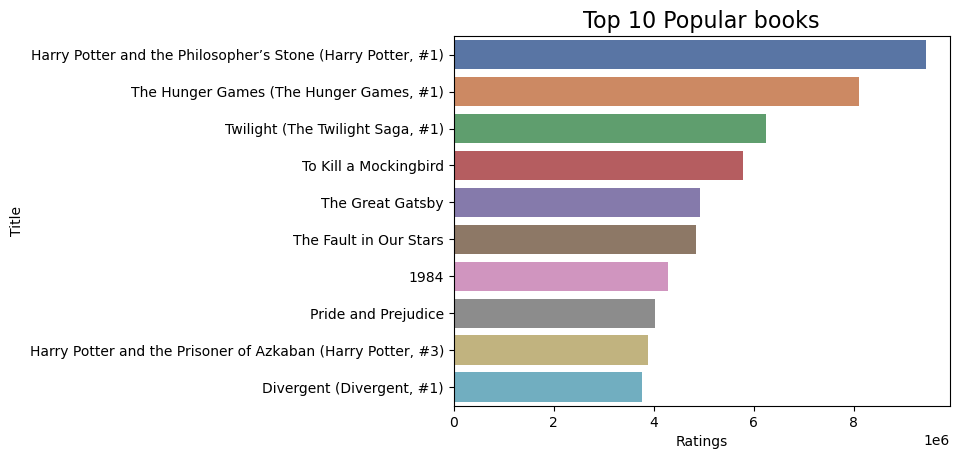

In [62]:
sns.barplot(data=top10, x='Ratings', y='Title', palette='deep')
plt.title("Top 10 Popular books", fontsize=16)
plt.show()

In [64]:
#rating and score ratio
top10['Ratio'] = top10['Ratings'] / top10['Score']

In [65]:
top10.sort_values('Ratio', ascending=False)

,Unnamed: 0,Title,Author,Score,Ratings,Published,Ratio
3371,3371,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.470,9444576,1997,2112880.537
207,207,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.330,8110032,2008,1872986.605
3347,3347,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.640,6246259,2005,1716005.220
1652,1652,To Kill a Mockingbird,Harper Lee,4.270,5784208,1960,1354615.457
1480,1480,The Great Gatsby,F. Scott Fitzgerald,3.930,4926249,1925,1253498.473
2480,2480,The Fault in Our Stars,John Green,4.150,4853123,2012,1169427.229
4105,4105,1984,George Orwell,4.190,4291378,1949,1024195.227
3400,3400,Pride and Prejudice,Jane Austen,4.280,4018248,1813,938842.991
3142,3142,"Divergent (Divergent, #1)",Veronica Roth,4.150,3767029,2011,907717.831
1396,1396,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.580,3891556,1999,849684.716


Who are the most popular authors?

In [85]:
goodreads_df.groupby('Author')['Ratings'].sum().sort_values(ascending=False)[:10].reset_index()

,Author,Ratings
0,J.K. Rowling,31255912
1,Suzanne Collins,14852619
2,Stephenie Meyer,11657785
3,Colleen Hoover,9703509
4,John Green,9188384
5,Stephen King,9023149
6,J.R.R. Tolkien,8852149
7,Dan Brown,8097731
8,George Orwell,7937250
9,Jane Austen,7381097


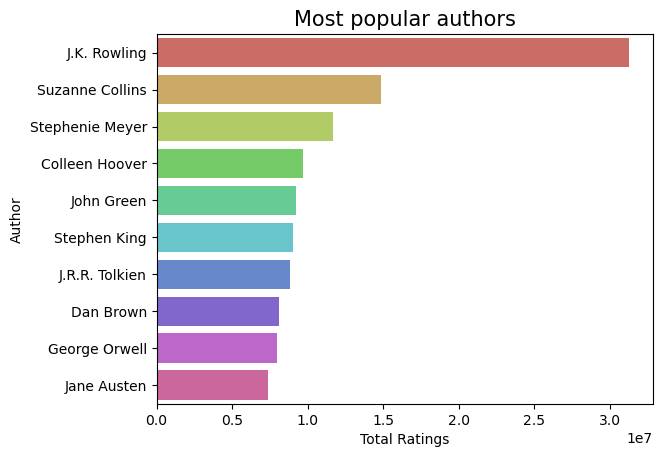

In [86]:
author_df = goodreads_df.groupby('Author')['Ratings'].sum().sort_values(ascending=False)[:10].reset_index()
sns.barplot(data=author_df, x='Ratings', y='Author', palette='hls')
plt.xlabel("Total Ratings")
plt.title("Most popular authors", fontsize=15)
plt.show()

Which authors have written the most books from our dataset?